**Importing the necessary libraries**

In [59]:
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import AdaBoostClassifier    # For ensemble learning using AdaBoost
from sklearn.tree import DecisionTreeClassifier     # For decision tree classification
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix  # For evaluating model performance
import seaborn as sns            # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs


**Load the dataset**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

**Display the first 5 rows of the dataset to get an overview of the data structure**

In [ ]:
print(data.head())

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  Feature_25  Feature_26  Featu

**Displaying the First 10 Rows of the Dataset**

In [ ]:
print(data.head(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   
5    843786         M      12.45      15.70      82.57      477.1    0.12780   
6    844359         M      18.25      19.98     119.60     1040.0    0.09463   
7  84458202         M      13.71      20.83      90.20      577.9    0.11890   
8    844981         M      13.00      21.82      87.50      519.8    0.12730   
9  84501001         M      12.46      24.04      83.97      475.9    0.11860   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760    0.30010    0.14710  ... 

**Displaying the Last 10 Rows of the Dataset**

In [ ]:
print(data.tail(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
559  925291         B      11.51      23.93      74.52      403.5    0.09261   
560  925292         B      14.05      27.15      91.38      600.4    0.09929   
561  925311         B      11.20      29.37      70.67      386.0    0.07449   
562  925622         M      15.22      30.62     103.40      716.9    0.10480   
563  926125         M      20.92      25.09     143.00     1347.0    0.10990   
564  926424         M      21.56      22.39     142.00     1479.0    0.11100   
565  926682         M      20.13      28.25     131.20     1261.0    0.09780   
566  926954         M      16.60      28.08     108.30      858.1    0.08455   
567  927241         M      20.60      29.33     140.10     1265.0    0.11780   
568   92751         B       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
559    0.10210    0.11120    0.04105  

**Display the shape of the dataset.It returns the number of rows and columns in the DataFrame.**

In [ ]:
data.shape

(569, 32)

**Display summary information about the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

**Checking for missing values**

In [ ]:
print(data.isnull().sum())

ID            0
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


**Display statistical summary of numerical columns in the dataset**

In [ ]:
data.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Display transposed statistical summary of numerical columns in the dataset**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**Check for duplicate rows**

In [ ]:
num_total_rows = len(data) # Calculate total number of rows
num_duplicate_rows = data.duplicated().sum() # Calculate number of duplicate rows
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100 # Calculate percentage of duplicate rows
print(f"Number of Rows with Duplicates: {num_duplicate_rows}") # Print the results
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


**Outlier Detection using Interquartile Range (IQR)**

In [ ]:
# Loop through all numerical columns in the DataFrame
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Calculate the IQR (Interquartile Range) for the current column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for the current column
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Get the number of outliers
    num_outliers = len(outliers)

    # Display the number of outliers for the specified column
    print(f"Number of outliers for '{column}': {num_outliers}")


Number of outliers for 'Diagnosis': 0
Number of outliers for 'Feature_1': 14
Number of outliers for 'Feature_2': 7
Number of outliers for 'Feature_3': 13
Number of outliers for 'Feature_4': 25
Number of outliers for 'Feature_5': 6
Number of outliers for 'Feature_6': 16
Number of outliers for 'Feature_7': 18
Number of outliers for 'Feature_8': 10
Number of outliers for 'Feature_9': 15
Number of outliers for 'Feature_10': 15
Number of outliers for 'Feature_11': 38
Number of outliers for 'Feature_12': 20
Number of outliers for 'Feature_13': 38
Number of outliers for 'Feature_14': 65
Number of outliers for 'Feature_15': 30
Number of outliers for 'Feature_16': 28
Number of outliers for 'Feature_17': 22
Number of outliers for 'Feature_18': 19
Number of outliers for 'Feature_19': 27
Number of outliers for 'Feature_20': 28
Number of outliers for 'Feature_21': 17
Number of outliers for 'Feature_22': 5
Number of outliers for 'Feature_23': 15
Number of outliers for 'Feature_24': 35
Number of outl

**Counting Unique Values for Each Column**

In [ ]:
# Count unique values for each column
unique_counts = data.nunique()
# Display the unique counts
print(unique_counts)

Diagnosis       0
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


**Dropping unecessary columns (ID)**

In [ ]:
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)
print(data.columns) #verifying remaining columns

Index(['Diagnosis', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
       'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19',
       'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24',
       'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29',
       'Feature_30'],
      dtype='object')


**Encode Target variables**

In [ ]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Map 'M' to 1, 'B' to 0
print(data.head())                      # Check the first few rows after encoding

   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0        NaN      17.99      10.38     122.80     1001.0    0.11840   
1        NaN      20.57      17.77     132.90     1326.0    0.08474   
2        NaN      19.69      21.25     130.00     1203.0    0.10960   
3        NaN      11.42      20.38      77.58      386.1    0.14250   
4        NaN      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0    0.27760     0.3001    0.14710     0.2419  ...       25.38       17.33   
1    0.07864     0.0869    0.07017     0.1812  ...       24.99       23.41   
2    0.15990     0.1974    0.12790     0.2069  ...       23.57       25.53   
3    0.28390     0.2414    0.10520     0.2597  ...       14.91       26.50   
4    0.13280     0.1980    0.10430     0.1809  ...       22.54       16.67   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0      184.60      2019.0  

**Define Features and Target**

In [ ]:
X = data.iloc[:, :-1]                   # All columns except the last one
y = data.iloc[:, -1]                    # Last column (target variable)
print(X.shape, y.shape)                 # Verify shapes of features and target

(569, 30) (569,)


**Scaling Features**

In [ ]:
scaler = StandardScaler()
X = data.drop('Diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)
y = data['Diagnosis']

**Display the first few rows of the scaled features**

In [ ]:
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.097064  -2.073335   1.269934   0.984375   1.568466   3.283515   
1   1.829821  -0.353632   1.685955   1.908708  -0.826962  -0.487072   
2   1.579888   0.456187   1.566503   1.558884   0.942210   1.052926   
3  -0.768909   0.253732  -0.592687  -0.764464   3.283553   3.402909   
4   1.750297  -1.151816   1.776573   1.826229   0.280372   0.539340   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0   2.652874   2.532475   2.217515    2.255747  ...    1.886690   -1.359293   
1  -0.023846   0.548144   0.001392   -0.868652  ...    1.805927   -0.369203   
2   1.363478   2.037231   0.939685   -0.398008  ...    1.511870   -0.023974   
3   1.915897   1.451707   2.867383    4.910919  ...   -0.281464    0.133984   
4   1.371011   1.428493  -0.009560   -0.562450  ...    1.298575   -1.466770   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    2.303601    2.00

In [55]:
# 13. Splitting the data into training and testing sets (Splitting)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (398, 30)
Testing data shape: (171, 30)


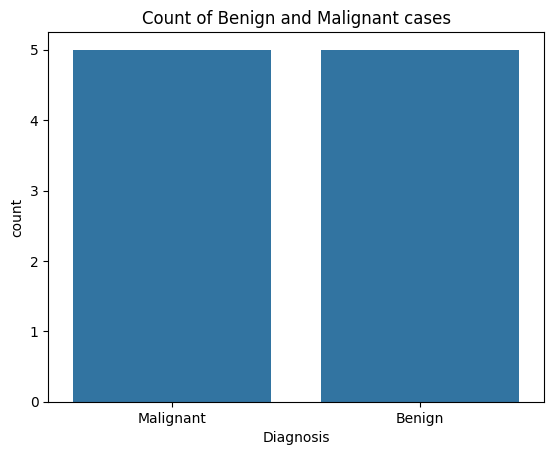